In [66]:
import numpy as np
compressed_array = np.load('compressed_array.npy', allow_pickle=True)
print(compressed_array)

[['transaction_blockNumber' '127928231-127928290' '127928291-127928350'
  ... '128476691-128476750' '128476751-128476810' '128476811-128476870']
 ['0xe4F331020abF610b037E88e2d11DE968CB800a36' 0 0 ... 0 0.0 0]
 ['0x056E5DE0E06e9f7A6B0A4036Af979E9DF3c6960C' 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 ['0xa86A4e829162454AFfaC5F3d87dA77FB0572C033' 0 0 ... 0 0 0]
 ['0xA87aF9caEe12E9ff40461Ced38F74de02a5963cD' 0 0 ... 0 0 0]
 ['0xb9F95f0fDA67C308aF3BD34964ac84c4C613fCB4' 0 0 ... 0 0 0]]


In [67]:
import numpy as np

# Load the compressed_array.npy file
#compressed_array = np.load('compressed_array.npy', allow_pickle=True)

# Replace the 'transaction_blockNumber' column with integer indexes from 1 to the length of the column
compressed_array[0, 1:] = np.arange(1, compressed_array.shape[1])

# Initialize a list to store the names with their respective indices
name_indices = []

# Replace the name strings at the start of other columns with integer indexes
for idx in range(1, compressed_array.shape[0]):
    name = compressed_array[idx, 0]
    name_indices.append((idx - 1, name))  # Store the index and name
    compressed_array[idx, 0] = idx - 1  # Replace the name with the index

# Save the names with their respective indices to a separate list
np.save('name_indices.npy', name_indices)

# Save the modified array back to a file
np.save('modified_compressed_array.npy', compressed_array)

print("Modified array and name indices saved successfully.")

Modified array and name indices saved successfully.


In [68]:
print(compressed_array)


[['transaction_blockNumber' 1 2 ... 9142 9143 9144]
 [0 0 0 ... 0 0.0 0]
 [1 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [923 0 0 ... 0 0 0]
 [924 0 0 ... 0 0 0]
 [925 0 0 ... 0 0 0]]


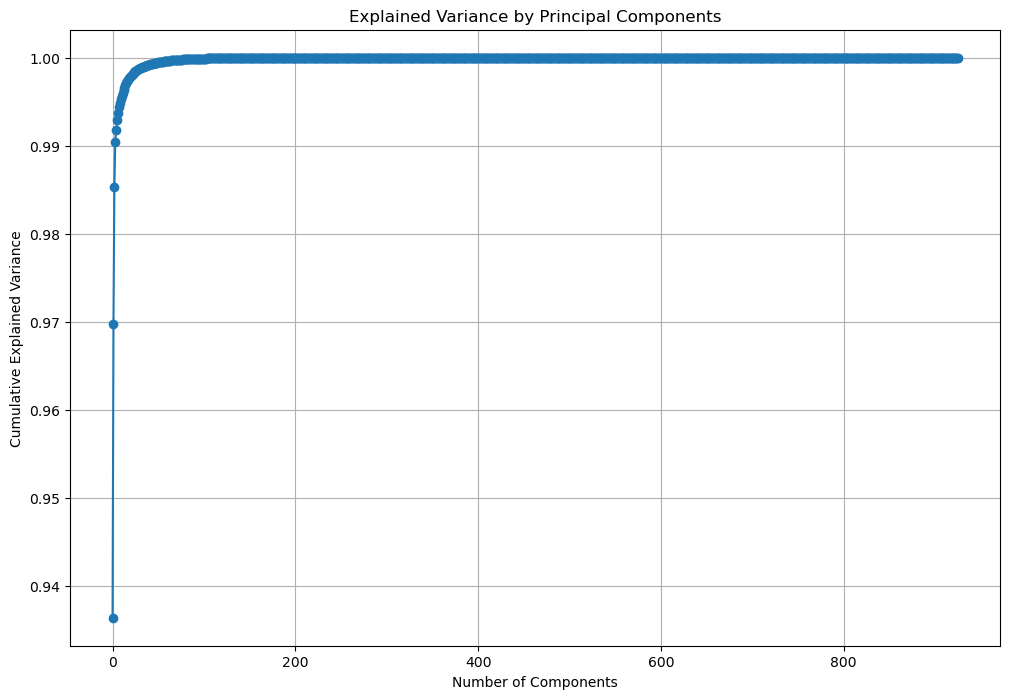

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the modified_compressed_array.npy file
compressed_array = np.load('modified_compressed_array.npy', allow_pickle=True)

# Extract all columns except the first column
data = compressed_array[1:, 1:].astype(float)

# Perform PCA
pca = PCA()
pca.fit(data)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [23]:
print(compressed_array)

[['transaction_blockNumber' 1 2 ... 9142 9143 9144]
 [0 0 0 ... 0 0.0 0]
 [1 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [923 0 0 ... 0 0 0]
 [924 0 0 ... 0 0 0]
 [925 0 0 ... 0 0 0]]


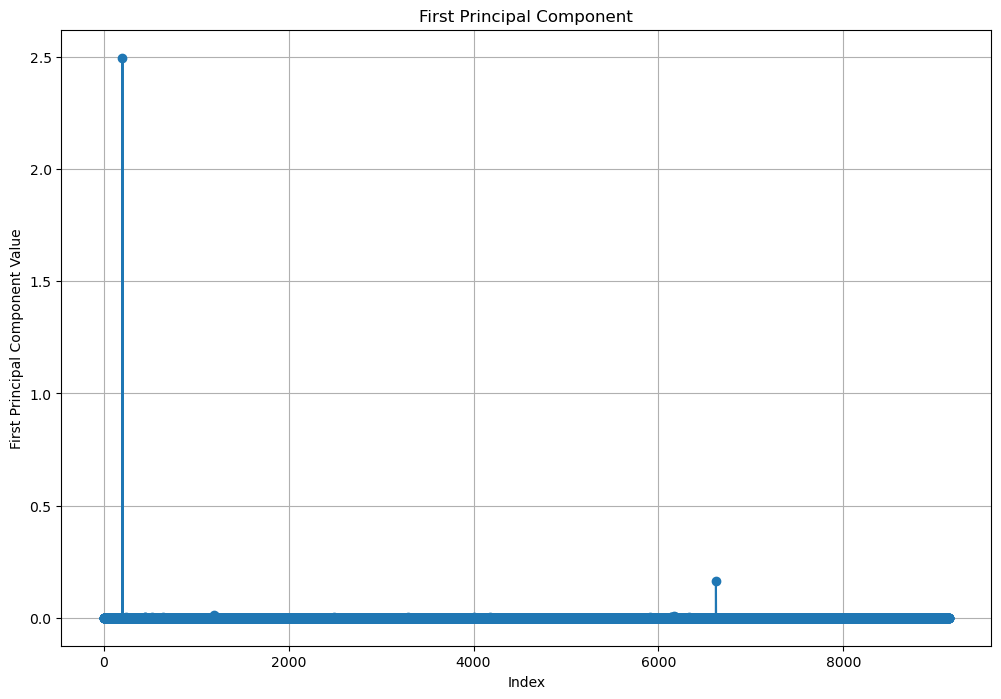

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the modified_compressed_array.npy file
compressed_array = np.load('modified_compressed_array.npy', allow_pickle=True)

# Transpose the compressed_array
transposed_array = compressed_array.T

# Extract all rows except the first row and all columns except the first column
data = transposed_array[1:, 1:].astype(float)

# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(data)

# Extract the first principal component
first_principal_component = principal_components[:, 0]

# Plot the first principal component
plt.figure(figsize=(12, 8))
plt.plot(first_principal_component, marker='o')
plt.xlabel('Index')
plt.ylabel('First Principal Component Value')
plt.title('First Principal Component')
#plt.ylim(0,0.05)
plt.grid(True)
plt.show()

C:\Users\abcgi\AppData\Local\Temp\ipykernel_27768\3863840953.py:10: RuntimeWarning: invalid value encountered in log
  log_components = np.log(non_zero_components)


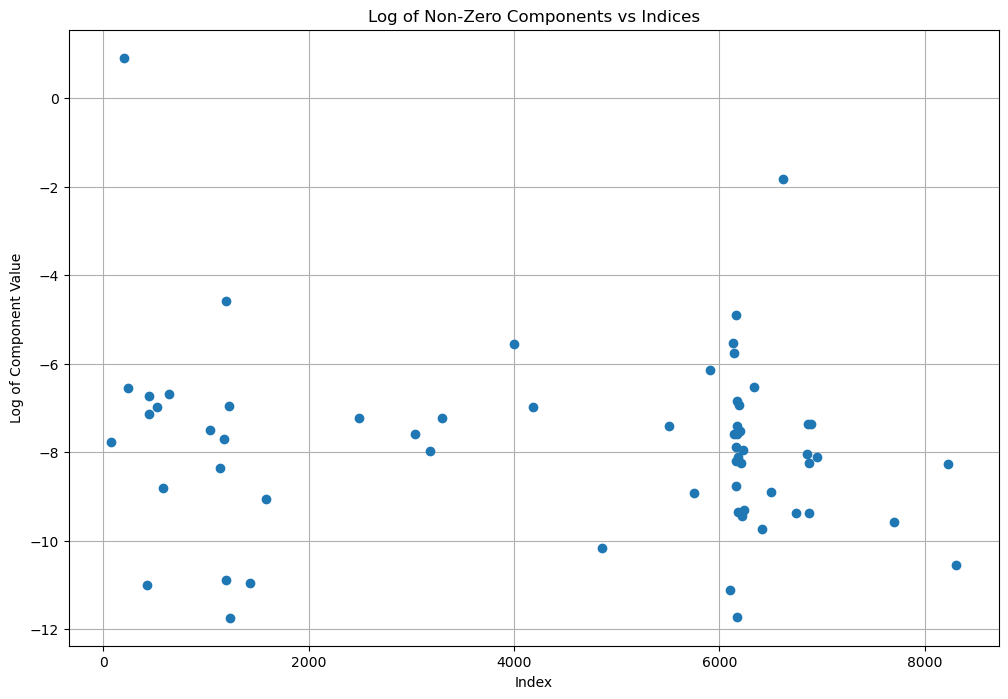

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming first_principal_component is your numpy array
# Extract the non-zero components
non_zero_indices = np.nonzero(first_principal_component)[0]
non_zero_components = first_principal_component[non_zero_indices]

# Calculate the logarithm of the non-zero components
log_components = np.log(non_zero_components)

# Plot the logarithm of the components versus their indices
plt.figure(figsize=(12, 8))
plt.plot(non_zero_indices, log_components, marker='o', linestyle='none')
plt.xlabel('Index')
plt.ylabel('Log of Component Value')
plt.title('Log of Non-Zero Components vs Indices')
plt.grid(True)
plt.show()

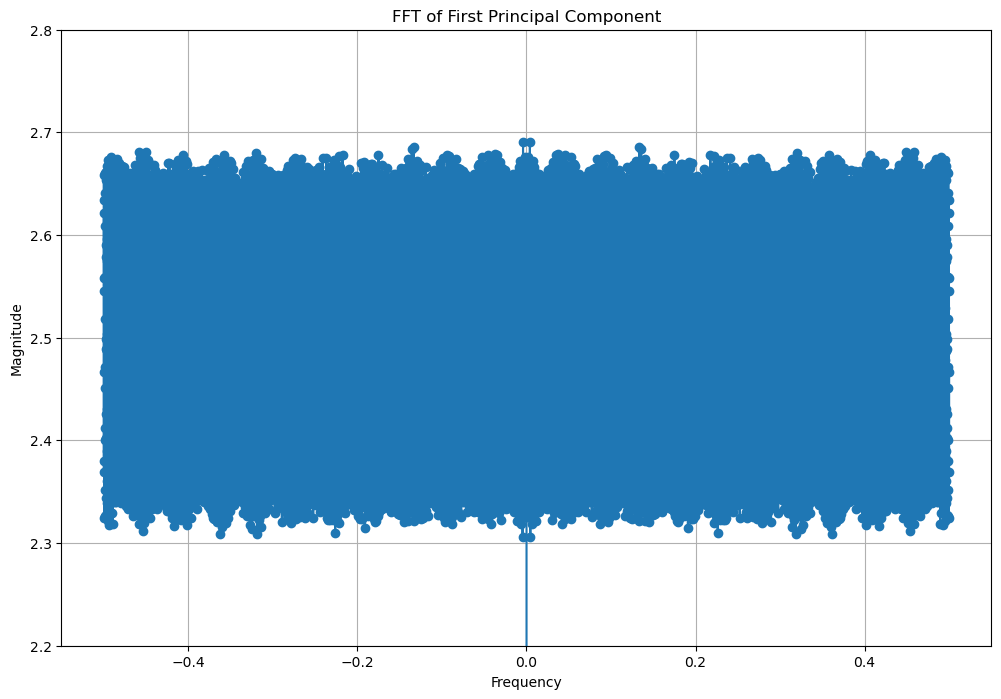

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

fft_result = np.fft.fft(first_principal_component)

# Calculate the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(first_principal_component))

# Plot the magnitude of the FFT
plt.figure(figsize=(12, 8))
plt.plot(frequencies, np.abs(fft_result), marker='o')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.ylim(2.2,2.8)
plt.title('FFT of First Principal Component')
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv(R"C:\Users\abcgi\Arbitrage\aggregated_transaction_hash2.csv")

# Filter the rows to include only positive 'opportunity_profit' values
filtered_df = df[df['opportunity_profit'] > 0]

# Create a numpy array with the filtered values
result_array = filtered_df[['opportunity_profit', 'transaction_priorityFeePerGas']].to_numpy()

# Sort the numpy array by the second column (transaction_priorityFeePerGas)
sorted_array = result_array[result_array[:, 1].argsort()]

# Save the sorted array to a file (optional)
np.save('sorted_array.npy', sorted_array)

print("Sorted array created successfully.")
print(sorted_array)

Sorted array created successfully.
[[3.53260489e-05 1.00000000e+00]
 [1.13039612e-06 1.00000000e+00]
 [1.01392503e-06 1.00000000e+00]
 ...
 [6.41575549e-04 2.49786629e+11]
 [1.79614836e-02 2.56312198e+11]
 [2.60382648e-02 2.68487384e+11]]


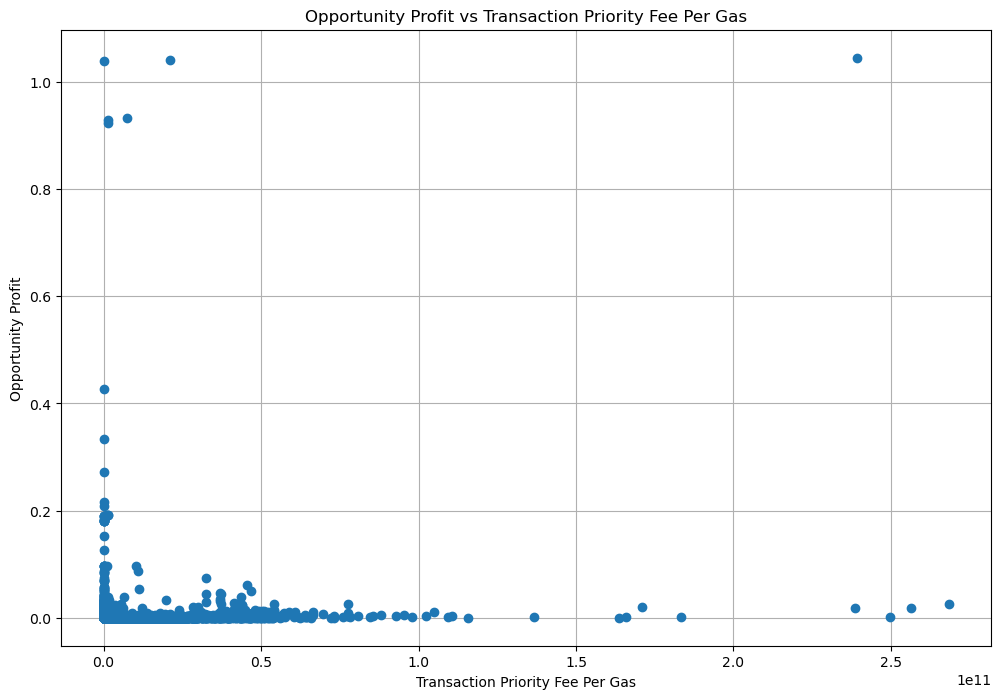

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Plot the sorted array
plt.figure(figsize=(12, 8))
plt.plot(sorted_array[:, 1], sorted_array[:, 0], marker='o', linestyle='none')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Opportunity Profit')
plt.title('Opportunity Profit vs Transaction Priority Fee Per Gas')
plt.grid(True)
plt.show()

In [3]:
np.save('profit_gas.npy', sorted_array)

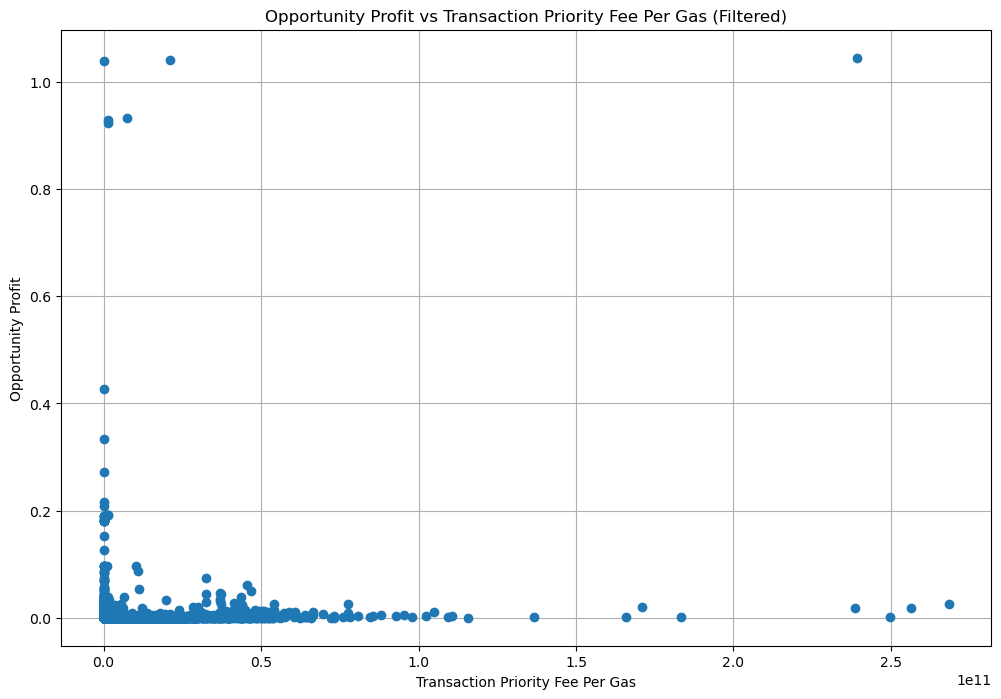

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter the sorted array to exclude values of the first column lower than 0.001
filtered_sorted_array = sorted_array[sorted_array[:, 0] >= 0.00001]

# Plot the filtered sorted array
plt.figure(figsize=(12, 8))
plt.plot(filtered_sorted_array[:, 1], filtered_sorted_array[:, 0], marker='o', linestyle='none')
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Opportunity Profit')
plt.title('Opportunity Profit vs Transaction Priority Fee Per Gas (Filtered)')
plt.grid(True)
plt.show()

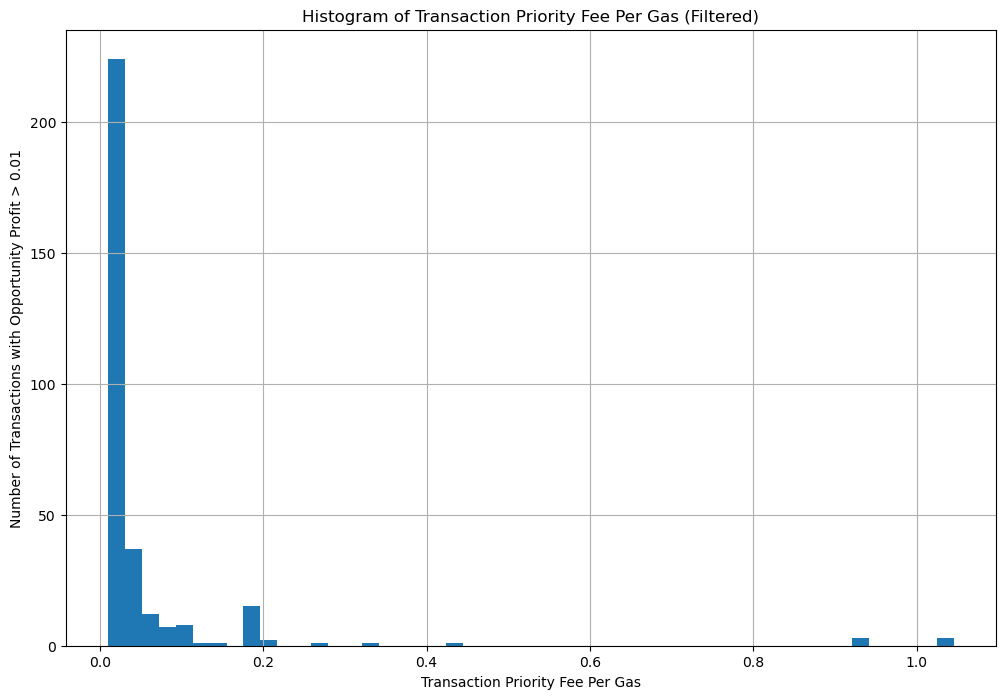

In [63]:
plt.figure(figsize=(12, 8))
plt.hist(filtered_sorted_array[:, 0], bins=50)
plt.xlabel('Transaction Priority Fee Per Gas')
plt.ylabel('Number of Transactions with Opportunity Profit > 0.01')
plt.title('Histogram of Transaction Priority Fee Per Gas (Filtered)')
plt.grid(True)
plt.show()

In [7]:
import numpy as np

# Assuming sorted_array is your numpy array
# Save the sorted_array to a .csv file
np.savetxt('sorted_arraycsv.csv', sorted_array, delimiter=',', header='opportunity_profit,transaction_priorityFeePerGas', comments='')

print("Numpy array saved to 'sorted_array.csv' successfully.")

Numpy array saved to 'sorted_array.csv' successfully.


Summed per gas array sorted successfully.
[[1.00000000e+00 2.30175503e-02]
 [2.00000000e+00 2.70067501e-03]
 [3.00000000e+00 2.93123627e-05]
 ...
 [2.49786629e+11 6.41575549e-04]
 [2.56312198e+11 1.79614836e-02]
 [2.68487384e+11 2.60382648e-02]]


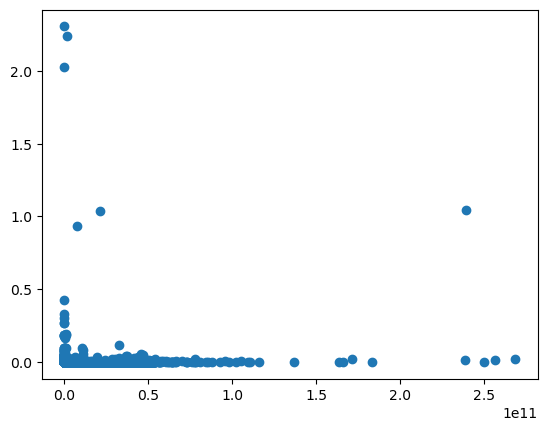

In [12]:
import numpy as np

# Assuming sorted_array is your numpy array
# Extract the unique values of the second column (transaction_priorityFeePerGas)
unique_gas_values = np.unique(sorted_array[:, 1])

# Initialize an empty list to store the summed values
summed_values = []

# Iterate over each unique gas value
for gas_value in unique_gas_values:
    # Sum the respective first column values (opportunity_profit) for the current gas value
    sum_profit = sorted_array[sorted_array[:, 1] == gas_value, 0].sum()
    # Append the gas value and the summed profit to the list
    summed_values.append([gas_value, sum_profit])

# Convert the list to a numpy array
summed_pergas = np.array(summed_values)

# Sort the summed_pergas array by the gas values (first column)
sorted_summed_pergas = summed_pergas[summed_pergas[:, 0].argsort()]

print("Summed per gas array sorted successfully.")
print(sorted_summed_pergas)

plt.scatter(sorted_summed_pergas[:, 0], summed_pergas[:, 1], marker='o')

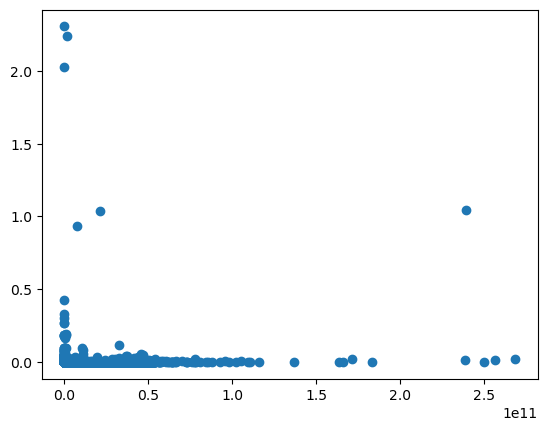

In [10]:
plt.scatter(summed_pergas[:, 0], summed_pergas[:, 1], marker='o')

In [14]:
import numpy as np

# Assuming sorted_array is your numpy array
# Save the sorted_array to a .csv file
np.savetxt(' summed_pergas.csv', sorted_summed_pergas, delimiter=',', header='transaction_priorityFeePerGas, opportunity_profit', comments='')

print("Numpy array saved to 'summed_pergas.csv' successfully.")

Numpy array saved to 'summed_pergas.csv' successfully.


In [15]:
filtered_summed_pergas = sorted_summed_pergas[sorted_summed_pergas[:, 1] >= 0.05]

print("Filtered summed per gas array:")
print(filtered_summed_pergas)

Filtered summed per gas array:
[[1.00000000e+05 2.02481812e+00]
 [1.23212000e+05 1.83168183e-01]
 [1.92883000e+05 5.30139668e-02]
 [3.78495000e+05 8.77625031e-02]
 [3.91598000e+05 5.64286540e-02]
 [7.44732000e+05 8.45911171e-02]
 [9.70725000e+05 5.07658586e-02]
 [9.99953000e+05 4.28613867e-01]
 [1.00000000e+06 2.30382076e+00]
 [1.00000100e+06 7.93481494e-02]
 [1.00010300e+06 7.05167535e-02]
 [1.00015600e+06 2.72250186e-01]
 [1.00024400e+06 9.63609440e-02]
 [1.10000000e+06 6.60547955e-02]
 [1.10003100e+06 9.58954676e-02]
 [1.20023800e+06 8.35114787e-02]
 [1.50023700e+06 5.07658586e-02]
 [1.50095900e+06 1.81255365e-01]
 [1.50150400e+06 5.33239154e-02]
 [2.76419900e+06 9.58954676e-02]
 [3.10558100e+06 1.90043565e-01]
 [3.92691600e+06 8.34980084e-02]
 [5.71829700e+06 7.35098314e-02]
 [1.99999990e+07 1.90066324e-01]
 [2.00000000e+07 2.66133630e-01]
 [2.40080490e+07 1.90043565e-01]
 [2.50000000e+07 3.01736058e-01]
 [5.00000000e+07 3.34164285e-01]
 [6.57654340e+07 9.58954676e-02]
 [6.81555090

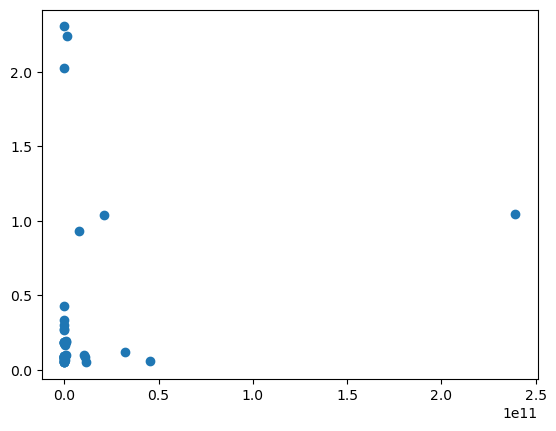

In [16]:
plt.scatter(filtered_summed_pergas[:, 0], filtered_summed_pergas[:, 1], marker='o')

In [1]:
import numpy as np

# Load the numpy array from the file
profit_gas = np.load('profit_gas.npy', allow_pickle=True)

print("Numpy array loaded successfully.")
print(profit_gas)

Numpy array loaded successfully.
[[3.53260489e-05 1.00000000e+00]
 [1.13039612e-06 1.00000000e+00]
 [1.01392503e-06 1.00000000e+00]
 ...
 [6.41575549e-04 2.49786629e+11]
 [1.79614836e-02 2.56312198e+11]
 [2.60382648e-02 2.68487384e+11]]


In [10]:
import numpy as np

# Load the numpy array from the file
profit_gas = np.load('profit_gas.npy', allow_pickle=True)

# Extract the first column
first_column = profit_gas[:, 0]

# Create intervals from 0 to 3 with a step of 0.01
intervals = np.arange(0, 1.51, 0.05)

# Initialize an array to store the sums
sums = np.zeros(len(intervals) - 1)

# Sum the numbers in the first column for each interval
for i in range(len(intervals) - 1):
    sums[i] = first_column[(first_column >= intervals[i]) & (first_column < intervals[i + 1])].sum()

# Save the sums in a separate array
np.save('sums.npy', sums)

print("Sums array created and saved successfully.")
print(sums)

Sums array created and saved successfully.
[12.43125975  2.16462286  0.1261557   2.94780782  0.4239987   0.27168802
  0.33320132  0.          0.4276047   0.          0.          0.
  0.          0.          0.          0.          0.          0.
  2.78442183  0.          3.12462229  0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]


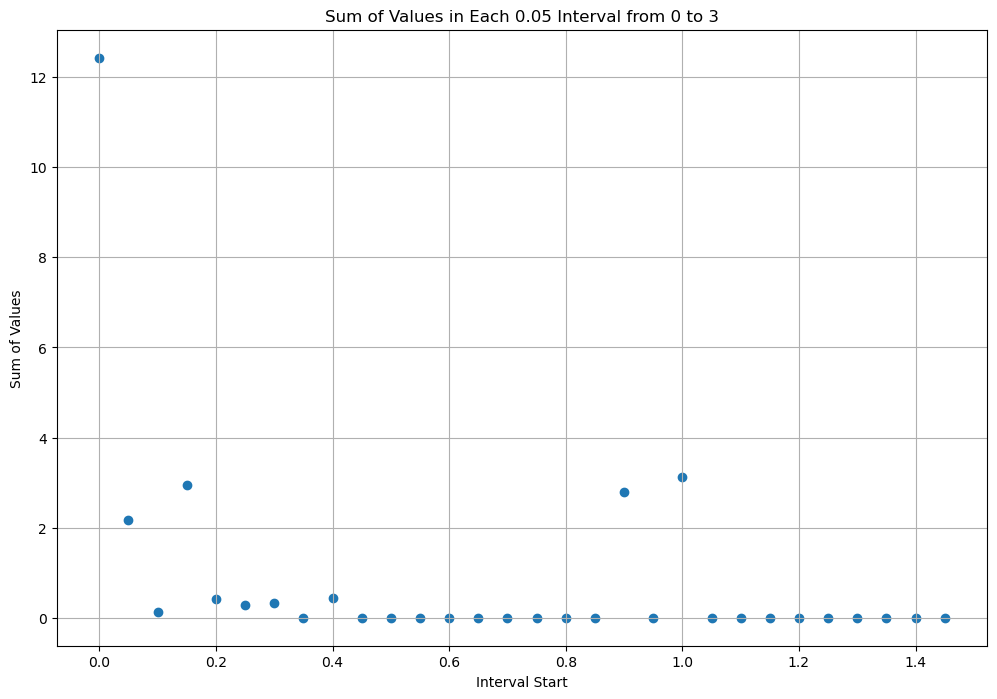

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load the sums array from the file
sums = np.load('sums.npy')

# Create intervals from 0 to 3 with a step of 0.01
intervals = np.arange(0, 1.50, 0.05)

# Plot the sums array
plt.figure(figsize=(12, 8))
plt.scatter(intervals, sums, marker='o')
plt.xlabel('Interval Start')
plt.ylabel('Sum of Values')
plt.title('Sum of Values in Each 0.05 Interval from 0 to 3')
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('aggregated_transaction_hash2.csv')

# Print the first value of the 'transaction_createdAt' column
first_value = df['transaction_createdAt'].iloc[0]
print("First value of 'transaction_createdAt':", first_value)

# Print the last value of the 'transaction_createdAt' column
last_value = df['transaction_createdAt'].iloc[-1]
print("Last value of 'transaction_createdAt':", last_value)

First value of 'transaction_createdAt': 2024-11-17 19:01:57
Last value of 'transaction_createdAt': 2024-11-25 04:12:13


In [143]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv(R"C:\Users\abcgi\OneDrive\Desktop\Binance\BTCUSDT\BTCUSDT-1m-2024-11-25.csv")

# Extract the 1st and 6th columns
column_1 = df.iloc[:, 0]
column_6 = df.iloc[:, 5]

# Calculate the difference between columns 3 and 4
difference_3_4 = df.iloc[:, 2] - df.iloc[:, 3]

# Create the numpy array with the extracted and calculated values
result_array= np.column_stack((column_1, column_6, difference_3_4))
day14=result_array

print("Numpy array created successfully.")
print(result_array)

Numpy array created successfully.
[[1.73249286e+12 4.48881400e+01 1.67070000e+02]
 [1.73249292e+12 3.58418900e+01 1.37000000e+02]
 [1.73249298e+12 1.92811300e+01 5.98500000e+01]
 ...
 [1.73257902e+12 2.93474600e+01 1.33320000e+02]
 [1.73257908e+12 2.42911100e+01 4.83900000e+01]
 [1.73257914e+12 3.38203800e+01 9.84600000e+01]]


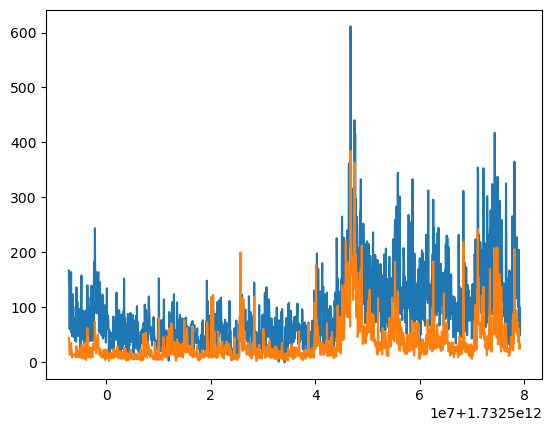

In [144]:
import matplotlib.pyplot as plt
plt.plot(result_array[:, 0], result_array[:, 2])
plt.plot(result_array[:, 0], result_array[:, 1])
plt.show()


In [45]:
print(np.shape(day1))
#print(day1)

(299, 3)


In [46]:
day1 = result_array[1140:,:]

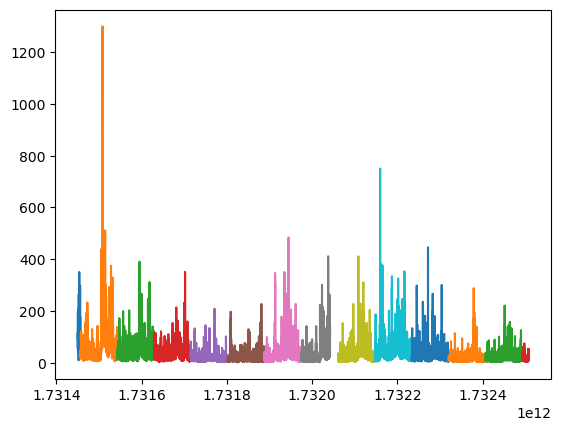

In [147]:
plt.plot(day1re[:, 0], day1re[:, 2])
plt.plot(day2[:, 0], day2[:, 1])
plt.plot(day3[:, 0], day3[:, 1])
plt.plot(day4[:, 0], day4[:, 1])
plt.plot(day5[:, 0], day5[:, 1])
plt.plot(day6[:, 0], day6[:, 1])
plt.plot(day7[:, 0], day7[:, 1])
plt.plot(day8[:, 0], day8[:, 1])
plt.plot(day9[:, 0], day9[:, 1])
plt.plot(day10[:, 0], day10[:, 1])
plt.plot(day11[:, 0], day11[:, 1])
plt.plot(day12[:, 0], day12[:, 1])  
plt.plot(day13[:, 0], day13[:, 1])
plt.plot(day14re[:, 0], day14re[:, 1])
plt.show()


In [146]:
day1re= day1[1341:,:]
day14re= day9re

In [148]:
all_days = np.concatenate((day1re, day2, day3, day4, day5, day6, day7, day8, day9, day10, day11, day12, day13, day14re), axis=0)

print(np.shape(all_days))
print("Concatenated array:")
print(all_days)

(17310, 3)
Concatenated array:
[[1.73145012e+12 1.61839100e+01 8.80000000e+01]
 [1.73145018e+12 2.39322800e+01 1.14330000e+02]
 [1.73145024e+12 2.08465600e+01 1.16020000e+02]
 ...
 [1.73250792e+12 3.69612700e+01 1.34000000e+01]
 [1.73250798e+12 2.54313500e+01 4.20500000e+01]
 [1.73250804e+12 3.30991700e+01 6.34000000e+01]]


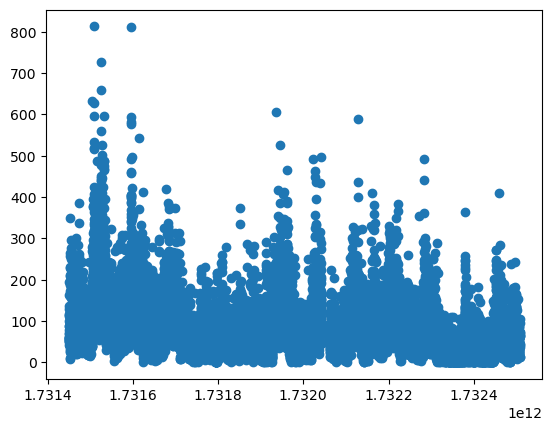

In [150]:
plt.scatter(all_days[:, 0], all_days[:, 2])
#plt.scatter(all_days[:, 0], all_days[:, 1])

In [165]:
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('aggregated_transaction_hash2.csv')

# Extract the 'transaction_block_number' and 'opportunity_profit' columns
selected_columns = df[['transaction_blockNumber', 'opportunity_profit']]

# Sort the DataFrame by the 'transaction_block_number' column
sorted_df = selected_columns.sort_values(by='transaction_blockNumber')

# Convert the sorted DataFrame to a numpy array without the header names
result_array = sorted_df.to_numpy()
profit_block = result_array

print("Numpy array created successfully.")
print(result_array)

Numpy array created successfully.
[[1.27928231e+08 0.00000000e+00]
 [1.27928231e+08 0.00000000e+00]
 [1.27928232e+08 0.00000000e+00]
 ...
 [1.28476825e+08 0.00000000e+00]
 [1.28476825e+08 0.00000000e+00]
 [1.28476827e+08 0.00000000e+00]]


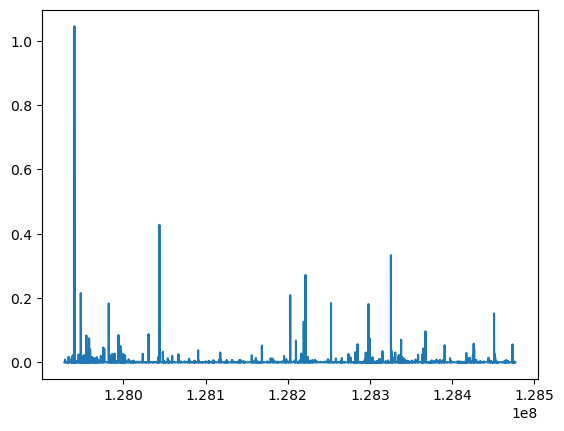

In [166]:

plt.plot(profit_block[:, 0], profit_block[:, 1])

In [154]:
print((profit_block[1157166,0]-profit_block[0,0])*2/60/60/24)

12.698981481481482


In [157]:
print((all_days[17309,0]-all_days[0,0])/60/60/24/1000)


12.244444444444445


In [159]:
import numpy as np

# Assuming all_days is your numpy array
# Example initialization (replace this with your actual array)

# Subtract the first value of the first column from the whole column and divide by 1000
all_days_scaled = np.copy(all_days)
all_days_scaled[:, 0] = (all_days[:, 0] - all_days[0, 0]) / 1000

print("Modified array:")
print(all_days)

Modified array:
[[1.73145012e+12 1.61839100e+01 8.80000000e+01]
 [1.73145018e+12 2.39322800e+01 1.14330000e+02]
 [1.73145024e+12 2.08465600e+01 1.16020000e+02]
 ...
 [1.73250792e+12 3.69612700e+01 1.34000000e+01]
 [1.73250798e+12 2.54313500e+01 4.20500000e+01]
 [1.73250804e+12 3.30991700e+01 6.34000000e+01]]


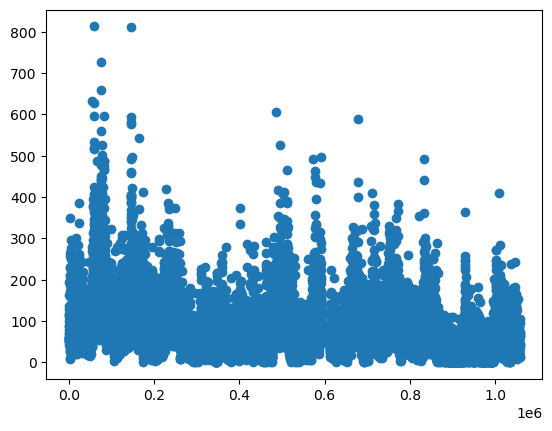

In [160]:
plt.scatter(all_days_scaled[:, 0], all_days_scaled[:, 2])


Modified array:
[[0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00]
 [1.00000e+00 0.00000e+00]
 ...
 [5.48594e+05 0.00000e+00]
 [5.48594e+05 0.00000e+00]
 [5.48596e+05 0.00000e+00]]


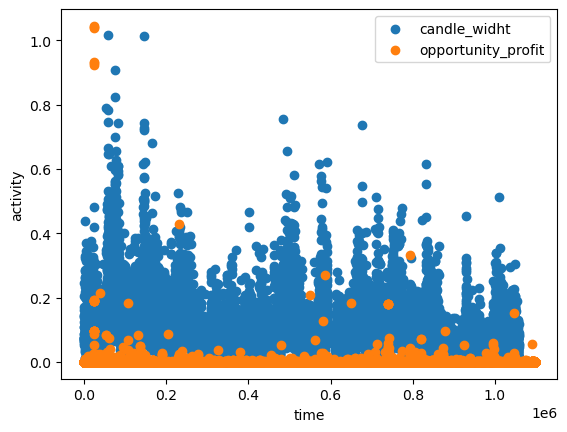

In [177]:
import numpy as np

# Assuming all_days is your numpy array
# Example initialization (replace this with your actual array)

# Subtract the first value of the first column from the whole column and divide by 1000
profit_block_scaled = np.copy(profit_block)
profit_block_scaled[:, 0] = (profit_block[:, 0] - profit_block[0, 0])

print("Modified array:")
print(profit_block_scaled)
plt.scatter(all_days_scaled[:, 0], all_days_scaled[:, 2]/800, label='candle_widht')
plt.scatter(profit_block_scaled[:, 0]*2, profit_block_scaled[:, 1], label='opportunity_profit')
plt.ylabel('activity')
plt.xlabel('time')
plt.legend()
plt.show()


In [114]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('aggregated_transaction_hash2.csv')

# Find the minimum and maximum values in the 'transaction_blockNumber' column
min_block_number = df['transaction_blockNumber'].min()
max_block_number = df['transaction_blockNumber'].max()

# Find the corresponding 'transaction_createdAt' values
min_created_at = df[df['transaction_blockNumber'] == min_block_number]['transaction_createdAt'].values[0]
max_created_at = df[df['transaction_blockNumber'] == max_block_number]['transaction_createdAt'].values[0]

print(f"Minimum transaction_blockNumber: {min_block_number}, corresponding transaction_createdAt: {min_created_at}")
print(f"Maximum transaction_blockNumber: {max_block_number}, corresponding transaction_createdAt: {max_created_at}")

Minimum transaction_blockNumber: 127928231, corresponding transaction_createdAt: 2024-11-12 23:47:19
Maximum transaction_blockNumber: 128476827, corresponding transaction_createdAt: 2024-11-25 16:33:51
